In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# covariates are uniform distribution and noise are normally distributed

In [28]:
n_samples=100
np.random.seed(40)
x1=np.random.rand(n_samples)
x2 = np.random.rand(n_samples)
x3=np.random.rand(n_samples)
x4=np.random.rand(n_samples)
noise = np.random.normal(0,20,n_samples)

In [29]:
y = 0.1*x1 + 0.5*x2 + 0.7*x3 + 1*x4 + noise

In [30]:
y

array([-12.73873594, -20.43270094,   5.14492772, -19.40571582,
       -17.17523726,  11.41553159,   0.2728202 ,  35.3693745 ,
       -10.97957746,   3.53634416,  31.79420078,  24.69541858,
         5.41956959,  23.43089461,  24.18847689,   6.20981859,
        12.04487673,   2.45695552,  -1.68228148, -30.24282819,
        -2.15688226,  -5.42874857,  -8.71052744,   5.05357744,
        14.01202472,  19.2553358 ,   3.70611118, -15.46361662,
        11.45833694,   1.36221482,  13.35546324,   0.57310634,
        -4.8230079 , -18.17748147,   7.09088007,  -9.89713117,
       -17.19921368, -14.80408442,  27.68699976,  -4.05520596,
       -15.47746934, -26.09835768,  24.0413506 ,  23.57277691,
         2.17495304,  -6.16065899,   5.5010009 ,   9.77798918,
       -19.15420303, -60.24216323,  23.07609721,  10.41136667,
        15.54755292, -12.72978721, -27.55114459,  50.84350835,
        16.81151684, -22.67317612, -31.34293125, -20.8504196 ,
        20.42418083,   9.4991869 ,   7.91323877,  -0.91

In [31]:
data = {
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'target': y
}
df=pd.DataFrame(data)

In [32]:
df

,x1,x2,x3,x4,target
0,0.407687,0.710769,0.009641,0.649704,-12.738736
1,0.055366,0.965794,0.223857,0.772075,-20.432701
2,0.788535,0.004224,0.394830,0.411901,5.144928
3,0.287305,0.217795,0.081124,0.055453,-19.405716
4,0.450351,0.461265,0.030621,0.166261,-17.175237
...,...,...,...,...,...
95,0.283892,0.406458,0.561533,0.169137,43.572787
96,0.181247,0.576863,0.513411,0.952013,-3.666163
97,0.666699,0.244294,0.444534,0.047904,-25.180062
98,0.519644,0.256323,0.056507,0.113573,-1.314585


In [33]:
df.describe()

,x1,x2,x3,x4,target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.493435,0.487255,0.454050,0.475477,2.571297
std,0.293902,0.284843,0.268159,0.292255,18.920852
min,0.012082,0.000427,0.002875,0.003135,-60.242163
25%,0.200311,0.257967,0.226823,0.185314,-10.893108
50%,0.499747,0.459717,0.459713,0.496119,2.848174
75%,0.747139,0.738213,0.639434,0.692529,14.395907
max,0.980939,0.992275,0.994864,0.993751,50.843508


In [34]:
import matplotlib.pyplot as plt

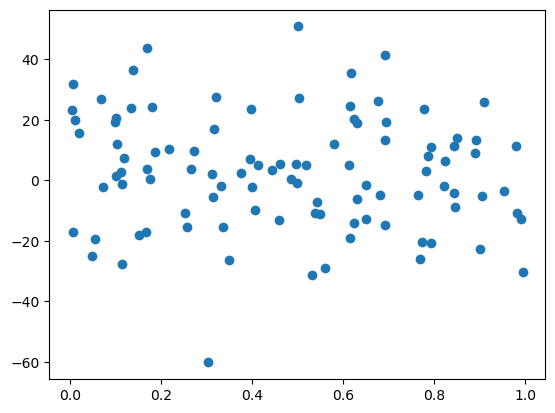

In [35]:
plt.scatter(df['x4'],df['target'])

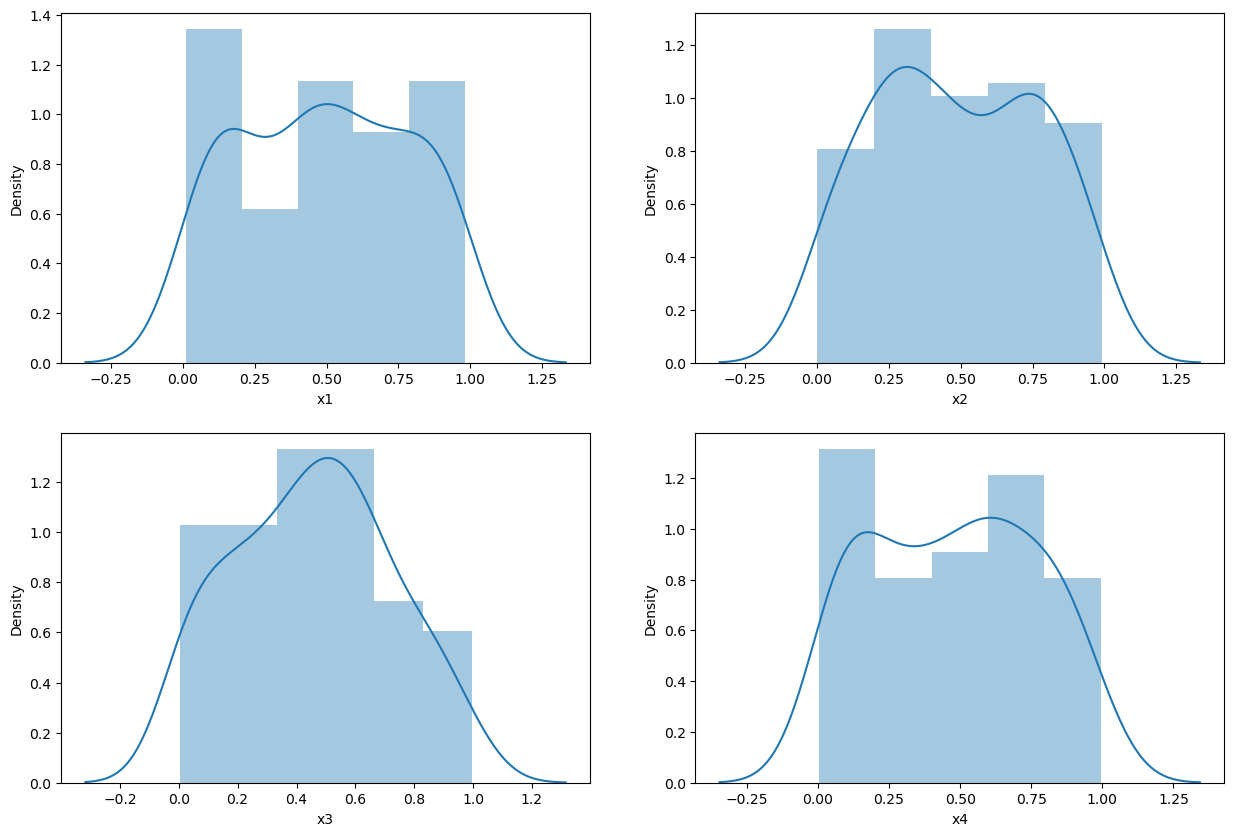

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(df['x1'],kde=True, ax=axes[0, 0])
sns.distplot(df['x2'],kde=True, ax=axes[0, 1])
sns.distplot(df['x3'],kde=True, ax=axes[1, 0])
sns.distplot(df['x4'],kde=True, ax=axes[1, 1])
plt.show()

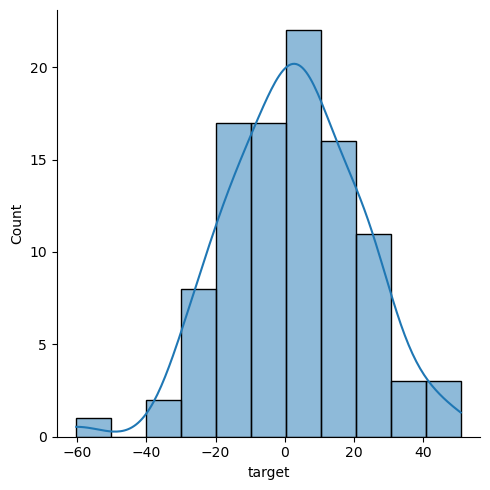

In [37]:
sns.displot(df['target'],kde=True)
plt.show()

## Box Plot

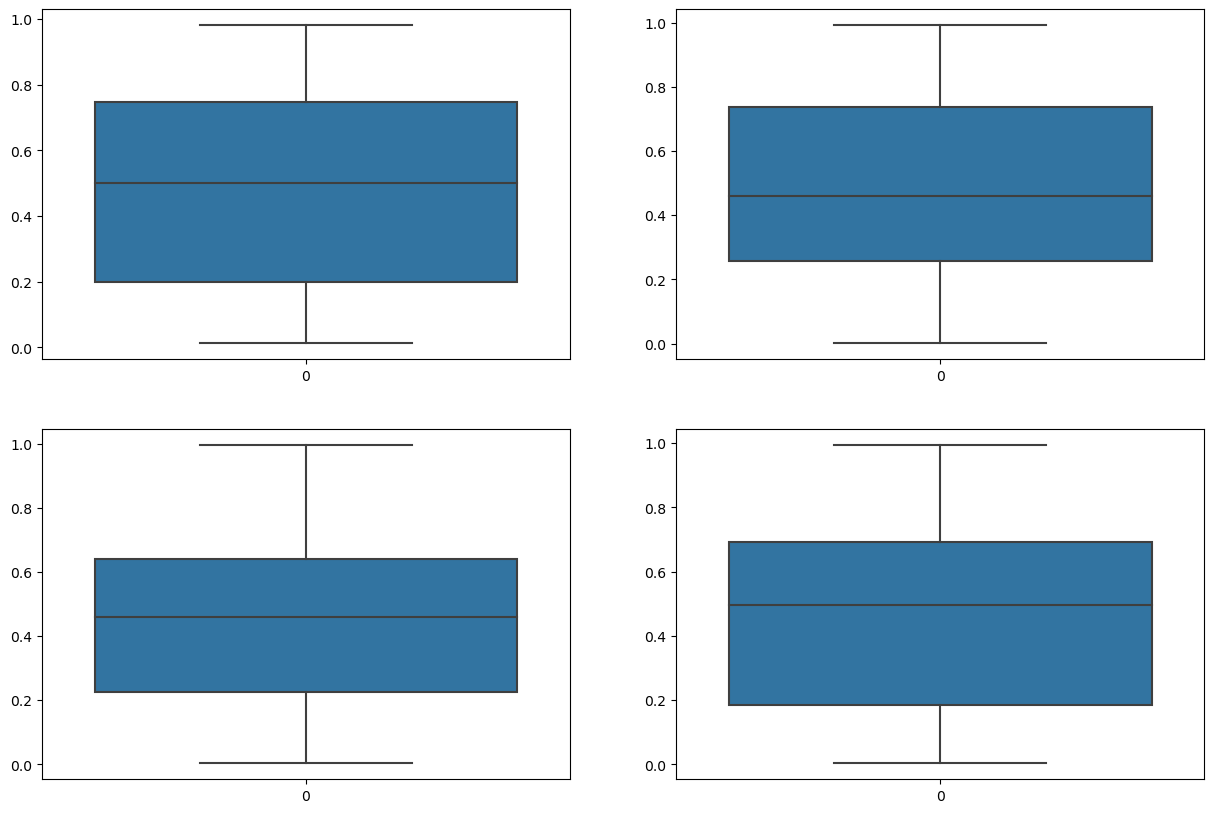

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(df['x1'], ax=axes[0, 0])
sns.boxplot(df['x2'], ax=axes[0, 1])
sns.boxplot(df['x3'], ax=axes[1, 0])
sns.boxplot(df['x4'], ax=axes[1, 1])
plt.show()

<Axes: >

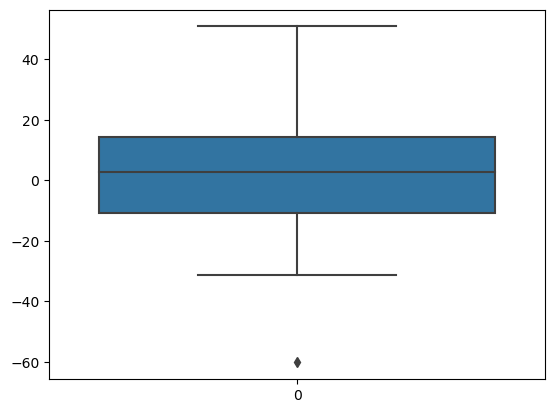

In [39]:
sns.boxplot(df['target'])

## Insights
-No outliers in covariates 
-One outlier in target

## Correlation between covariates and target

<Axes: >

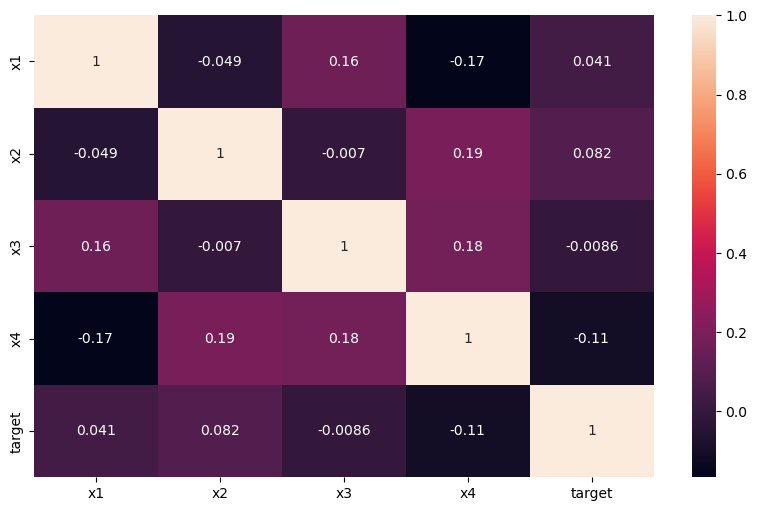

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

## Insights
-- target with x1 & x2 are positively correlated
-- target with x3 & x4 are negatively correlated

In [41]:
##Finding Outliers
count=0
minimum,Q1,Q2,Q3,maximum=np.quantile(df['target'],[0,0.25,0.50,0.75,1.0])
IQR = Q3-Q1
lower_fence = Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
outliers=[]
for i in df['target']:
    if i<lower_fence or i>higher_fence:
        outliers.append(i)
        

In [42]:
len(outliers)

1

### There is only one outliers

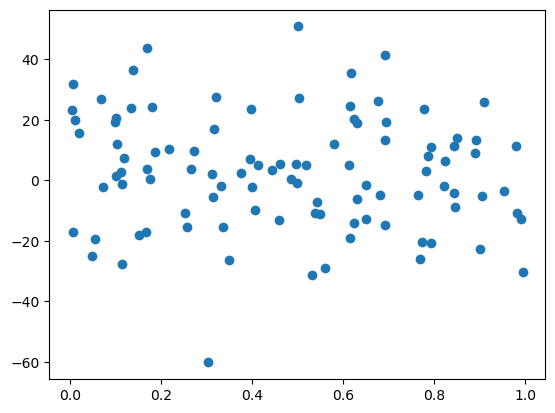

In [45]:
plt.scatter(df['x4'],df['target'])

# Now, involving weibull,gamma,uniform,rayleigh,normal distribution as covariates and noise as normal

In [18]:
n_samples=10000
np.random.seed(40)
X1=np.random.weibull(a=5,size=n_samples)
X2 = np.random.standard_gamma(shape=5,size=n_samples)
X3=np.random.uniform(low=2,high=5,size=n_samples)
X4=np.random.rayleigh(scale=2,size=n_samples)
X5=np.random.normal(100,40,n_samples)
Noise = np.random.normal(300,80,n_samples)
y = 6*X1 + 3*X2 + 3*X3 + 4 * X4 + 2.3*X5 + Noise

In [19]:
data = {
    'x1': X1,
    'x2': X2,
    'x3': X3,
    'x4': X4,
    'x5': X5,
    'target': y
}
df=pd.DataFrame(data)

## Plotting of each covariates and response

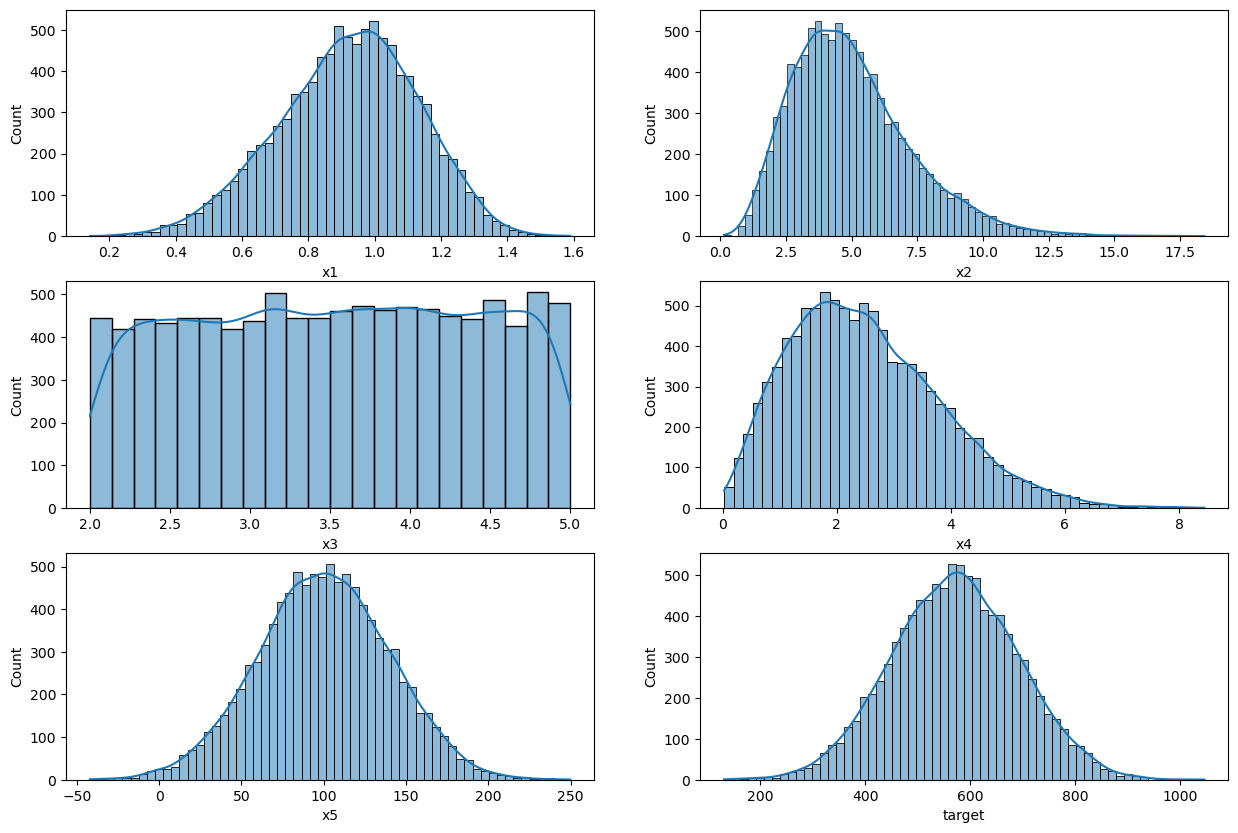

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(df['x1'],kde=True, ax=axes[0, 0])
sns.histplot(df['x2'],kde=True, ax=axes[0, 1])
sns.histplot(df['x3'],kde=True, ax=axes[1, 0])
sns.histplot(df['x4'],kde=True, ax=axes[1, 1])
sns.histplot(df['x5'],kde=True, ax=axes[2, 0])
sns.histplot(df['target'],kde=True, ax=axes[2, 1])
plt.show()

### Boxplot of response, see outliers

<Axes: >

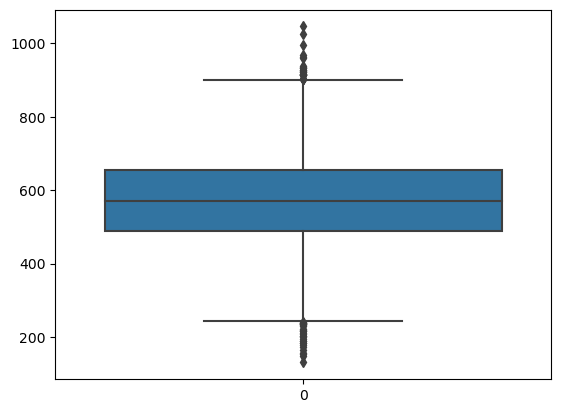

In [21]:
sns.boxplot(df['target'])

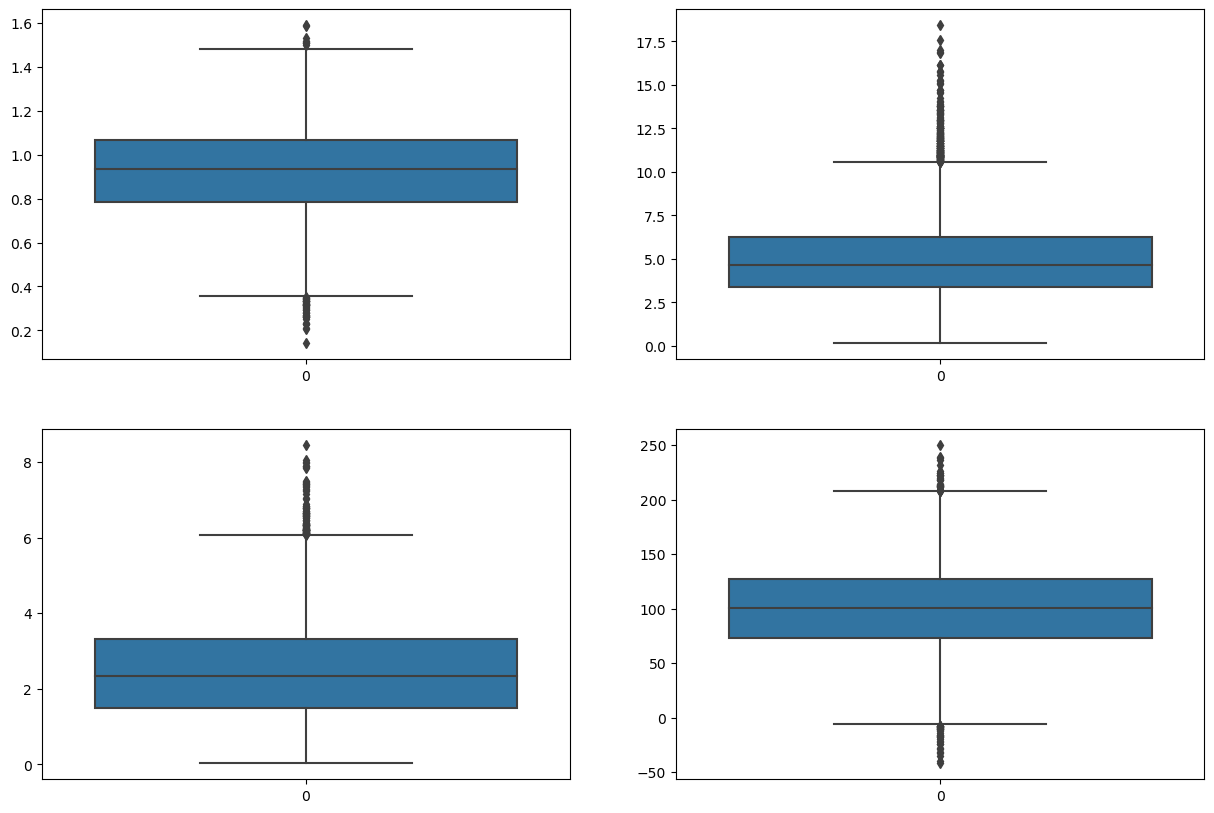

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(df['x1'], ax=axes[0, 0])
sns.boxplot(df['x2'], ax=axes[0, 1])
sns.boxplot(df['x4'], ax=axes[1, 0])
sns.boxplot(df['x5'], ax=axes[1, 1])
plt.show()

## Correlation between covariates and response

<Axes: >

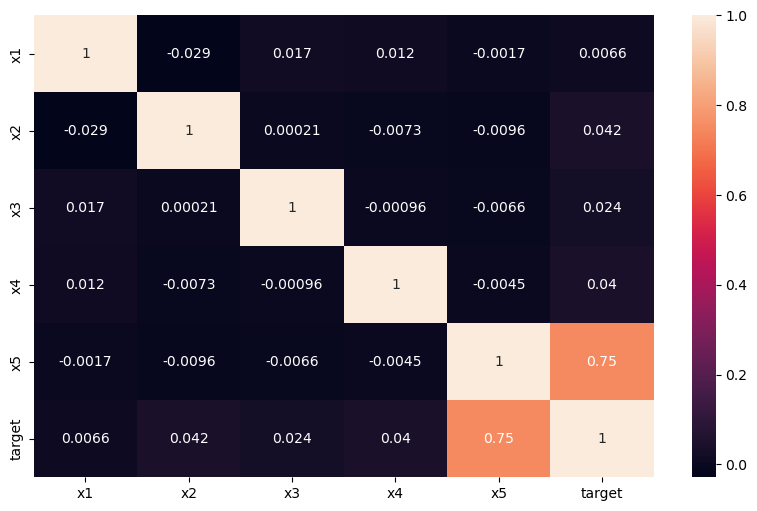

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

### Target and X5 are highly correlated

### Finding outliers, there are 57 outliers present

In [24]:
##Finding Outliers
count=0
minimum,Q1,Q2,Q3,maximum=np.quantile(df['target'],[0,0.25,0.50,0.75,1.0])
IQR = Q3-Q1
lower_fence = Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)
outliers=[]
for i in df['target']:
    if i<lower_fence or i>higher_fence:
        outliers.append(i)

In [25]:
print(len(outliers))

57
